In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs

/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import src.Teleconnection.pattern_statistic as ps
import src.plots.eof_plots as ept
import src.Teleconnection.spatial_pattern as sp

In [3]:
# %%
allens = xr.open_dataset("/work/mh0033/m300883/transition/gr19/gphSeason/allens_season_time.nc")
#%% split ens
splitens = sp.split_ens(allens)

#%% demean ens-mean
demean = splitens-splitens.mean(dim = 'ens')

#%% select traposphere
trop = demean.sel(hlayers = slice(20000,100000))

In [4]:
splitens

<xarray.Dataset>
Dimensions:    (time: 149, bnds: 2, lon: 70, lat: 32, ens: 100, hlayers: 26)
Coordinates:
  * time       (time) object 1851-03-16 11:52:00 ... 1999-03-16 11:52:00
  * lon        (lon) float64 -90.0 -88.12 -86.25 -84.38 ... 35.62 37.5 39.38
  * lat        (lat) float64 79.27 77.41 75.54 73.68 ... 27.05 25.18 23.32 21.45
  * ens        (ens) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99
  * hlayers    (hlayers) float64 10.0 20.0 50.0 100.0 ... 8.5e+04 9.25e+04 1e+05
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1851-01-31 23:52:00 ... 1999-05-01 23:52:00
    var156     (time, lat, lon, ens, hlayers) float32 6.394e+04 ... 125.9
Attributes:
    CDI:                       Climate Data Interface version 2.0.5 (https://...
    Conventions:               CF-1.6
    institution:               Max Planck Institute for Meteorology
    history:                   Fri Jul 15 10:59:24 2022: cdo -r -copy allens_...
    cdo_openmp_thread_number:  48
    frequency:                 year
    CDO:                       Climate Data Operators version 2.0.5 (https://...

# Field mean time series Z1000

In [20]:
Z1000 = splitens.sel(hlayers = 100000).var156
datetimeindex = Z1000.indexes['time'].to_datetimeindex()
Z1000['time'] = datetimeindex

/tmp/ipykernel_4141330/1342180265.py:2: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = Z1000.indexes['time'].to_datetimeindex()


In [23]:
weights = sp.sqrtcoslat(Z1000)
weighted = Z1000*weights
fieldmean = weighted.mean(dim = ('lat','lon'))
fieldmean

<xarray.DataArray 'var156' (time: 149, ens: 100)>
array([[84.09303265, 95.27019939, 88.7117021 , ..., 84.3115107 ,
        89.29866361, 90.97689033],
       [85.94176277, 84.50043445, 93.71514025, ..., 82.14672055,
        90.53943736, 91.6058505 ],
       [75.42005572, 82.66340511, 93.16891279, ..., 82.58554571,
        86.36958875, 89.22280453],
       ...,
       [90.42404825, 91.14286341, 81.100342  , ..., 93.32228832,
        87.61826322, 81.3048193 ],
       [84.1374485 , 81.06763418, 97.45908224, ..., 89.97688753,
        88.57335546, 87.30765671],
       [87.61939083, 93.5689656 , 82.26880321, ..., 91.60307731,
        95.24960843, 89.29816723]])
Coordinates:
  * time     (time) datetime64[ns] 1851-03-16T11:52:00 ... 1999-03-16T11:52:00
  * ens      (ens) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99
    hlayers  float64 1e+05

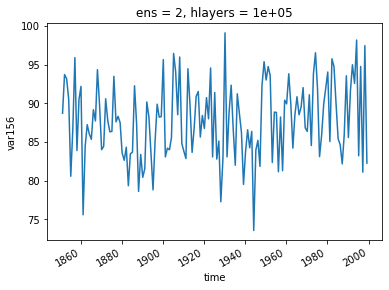

In [24]:
fieldmean.sel(ens = 2).plot()

In [32]:
fieldmean_df = fieldmean.to_dataframe()
fieldmean_df = fieldmean_df[['var156']].reset_index()

In [33]:
fieldmean_df

,time,ens,var156
0,1851-03-16 11:52:00,0,84.093033
1,1851-03-16 11:52:00,1,95.270199
2,1851-03-16 11:52:00,2,88.711702
3,1851-03-16 11:52:00,3,82.039306
4,1851-03-16 11:52:00,4,87.329259
...,...,...,...
14895,1999-03-16 11:52:00,95,92.070148
14896,1999-03-16 11:52:00,96,81.701018
14897,1999-03-16 11:52:00,97,91.603077
14898,1999-03-16 11:52:00,98,95.249608


<AxesSubplot:xlabel='time', ylabel='var156'>

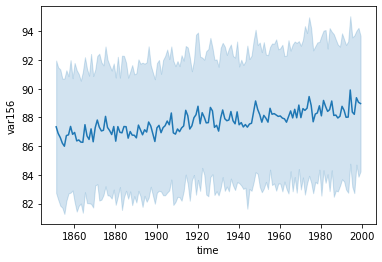

In [35]:
sns.lineplot(data = fieldmean_df,x = 'time',y = 'var156',ci = 'sd')